In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("D:\Ashvini\Data Science\Data for practise\Credit Score Classification Dataset.csv")

In [3]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [4]:
df.shape

(164, 8)

In [5]:
df.dtypes

Age                    int64
Gender                object
Income                 int64
Education             object
Marital Status        object
Number of Children     int64
Home Ownership        object
Credit Score          object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [7]:
df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [8]:
#df.drop_duplicates(inplace=True)

In [9]:
#df.duplicated().sum()

In [10]:
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.975610,83765.243902,0.652439
std,8.477289,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


In [11]:
cat_vars = df.select_dtypes(include=['object']).columns

In [12]:
print('var:',cat_vars)

var: Index(['Gender', 'Education', 'Marital Status', 'Home Ownership',
       'Credit Score'],
      dtype='object')


In [13]:
for i in cat_vars:
    print(i)

Gender
Education
Marital Status
Home Ownership
Credit Score


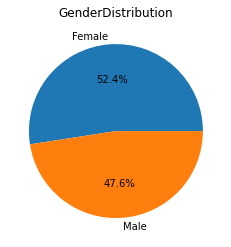

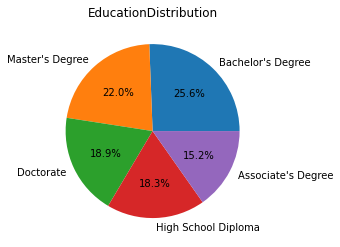

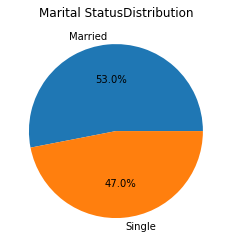

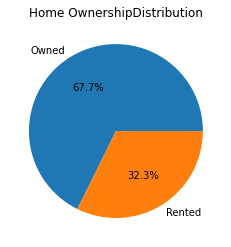

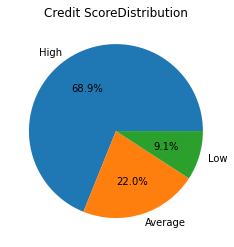

In [14]:

for i,var in enumerate(cat_vars):
    count= df[var].value_counts()
    plt.pie(count, labels=count.index,autopct='%1.1f%%')
    plt.title(f'{var}Distribution')
    #plt.legend()
    plt.show()

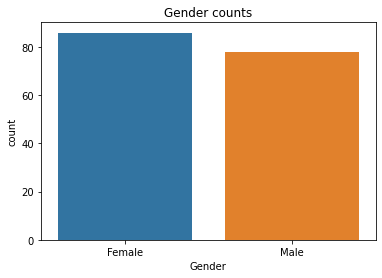

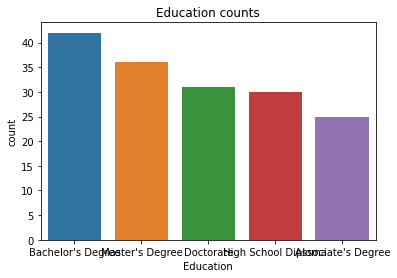

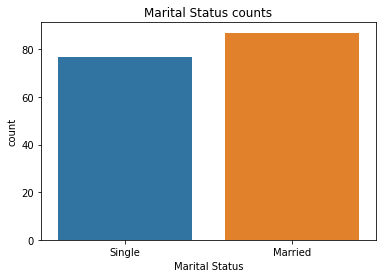

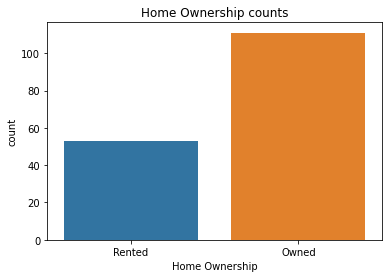

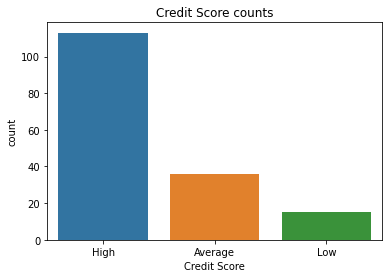

In [15]:
for i,var in enumerate(cat_vars):
    count= df[var].value_counts()
    sns.countplot(x=var, data=df)

    plt.title(f'{var} counts')
    #plt.legend()
    plt.show()

In [16]:
num_vars = df.select_dtypes(include=['int64']).columns

In [17]:
num_vars=num_vars[0:2]

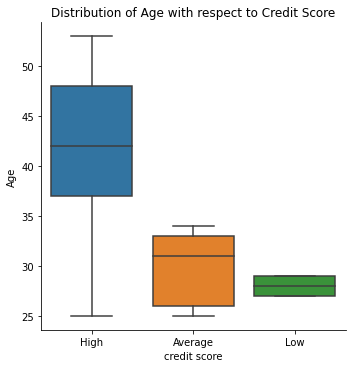

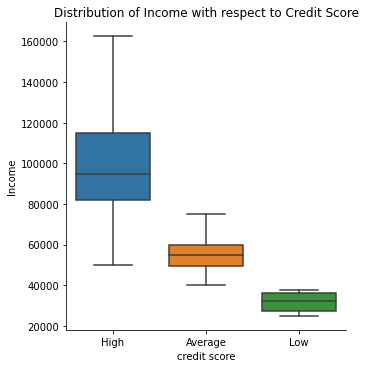

In [18]:
for i in num_vars:
    sns.catplot(x='Credit Score', y=i, kind='box', data=df)

    plt.ylabel(f'{i}')
    plt.xlabel('credit score')
    plt.title(f'Distribution of {i} with respect to Credit Score')
    plt.show()

In [19]:
for i in cat_vars:
    print(f'{i}:  {df[i].unique()}')

Gender:  ['Female' 'Male']
Education:  ["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]
Marital Status:  ['Single' 'Married']
Home Ownership:  ['Rented' 'Owned']
Credit Score:  ['High' 'Average' 'Low']


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
encoder=LabelEncoder()

In [22]:
for i in cat_vars:
    df[i]=encoder.fit_transform(df[i])

In [23]:
for i in cat_vars:
    print(f'{i}:  {df[i].unique()}')

Gender:  [0 1]
Education:  [1 4 2 3 0]
Marital Status:  [1 0]
Home Ownership:  [1 0]
Credit Score:  [1 0 2]


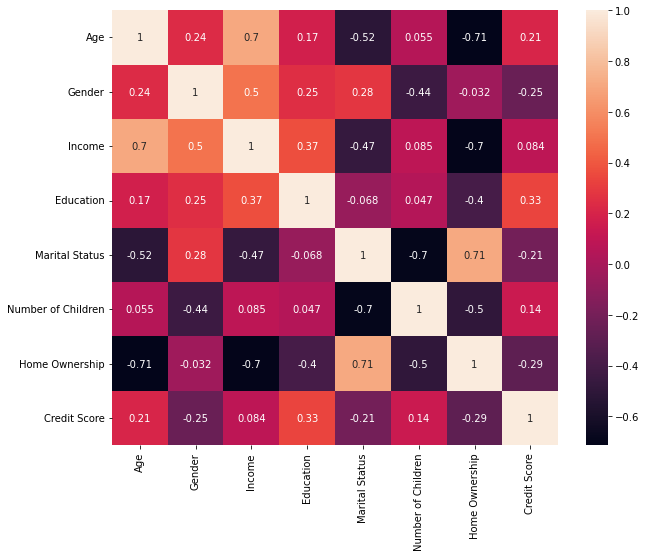

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X=df.drop("Credit Score",axis=1)

In [27]:
y=df['Credit Score']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [29]:
X_train.shape

(131, 7)

In [30]:
X_test.shape

(33, 7)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [32]:
dtree=DecisionTreeClassifier(class_weight ="balanced")
param_grid={'max_depth':[3,4,5,6,7],
            'min_samples_split':[2,3],
           'min_samples_leaf':[1,2,3,4],
           'random_state':[0,42]}

In [33]:
grid_search=GridSearchCV(dtree,param_grid)

In [34]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3], 'random_state': [0, 42]})

In [35]:
grid_search.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 0}

In [36]:
dtree=DecisionTreeClassifier(random_state=42,max_depth=3,min_samples_leaf=1,min_samples_split=2)

In [37]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [38]:
y_pred=dtree.predict(X_test)

In [39]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("precision_score: ",precision_score(y_test,y_pred,average='micro'))
print("recall_score: ",recall_score(y_test,y_pred,average='micro'))
print("f1_score:",f1_score(y_test,y_pred,average='micro'))

Accuracy Score:  0.9696969696969697
precision_score:  0.9696969696969697
recall_score:  0.9696969696969697
f1_score: 0.9696969696969697


In [40]:
from sklearn.metrics import confusion_matrix

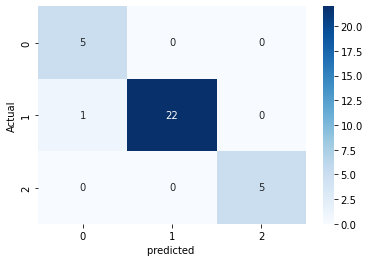

In [41]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Blues')
plt.xlabel("predicted ")
plt.ylabel("Actual")
plt.show()

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [43]:
clf=RandomForestClassifier(class_weight='balanced')

In [44]:
param_grid={'n_estimators':[100,200],
          'max_depth':[None,2,5,10],
           'max_features' : ["auto", "sqrt", "log2"],
           'random_state':[0,42]}

In [45]:
grid_search=GridSearchCV(clf,param_grid,cv=5)

In [46]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [None, 2, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200], 'random_state': [0, 42]})

In [47]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 100,
 'random_state': 0}

In [48]:
clf=RandomForestClassifier(max_depth=None,max_features='auto',n_estimators=100,random_state=0)

In [49]:
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [50]:
y_pred=clf.predict(X_test)

In [51]:
print("Accuracy score: ",accuracy_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test,y_pred,average='micro'))
print("precision: ",precision_score(y_test,y_pred,average='micro'))
print("recall: ",recall_score(y_test,y_pred,average='micro'))

Accuracy score:  0.9696969696969697
f1_score:  0.9696969696969697
precision:  0.9696969696969697
recall:  0.9696969696969697


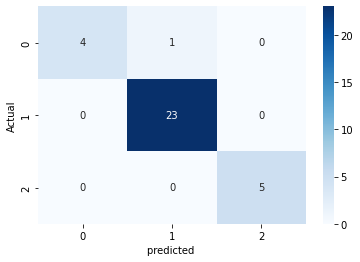

In [52]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Blues')
plt.xlabel("predicted ")
plt.ylabel("Actual")
plt.show()

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [54]:
lreg=LogisticRegression(class_weight= 'balanced')

In [55]:
param_grid={'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
          'C':[1.0,2.5,1.5,0.5],
           'max_iter' : [100,150,200],
           'random_state':[0,42]}

In [56]:
grid_search=GridSearchCV(lreg,param_grid,cv=5)

In [57]:
import warnings
warnings.filterwarnings("ignore")

In [58]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [1.0, 2.5, 1.5, 0.5], 'max_iter': [100, 150, 200],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [0, 42]})

In [59]:
grid_search.best_params_

{'C': 0.5, 'max_iter': 100, 'penalty': 'l2', 'random_state': 0}

In [60]:
lreg=LogisticRegression(penalty='none',max_iter=100,C=1.0,random_state=0)

In [61]:
lreg.fit(X_train,y_train)

LogisticRegression(penalty='none', random_state=0)

In [62]:
y_pred=lreg.predict(X_test)

In [63]:
print("Accuracy score: ",accuracy_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test,y_pred,average='micro'))
print("precision: ",precision_score(y_test,y_pred,average='micro'))
print("recall: ",recall_score(y_test,y_pred,average='micro'))

Accuracy score:  0.9393939393939394
f1_score:  0.9393939393939394
precision:  0.9393939393939394
recall:  0.9393939393939394


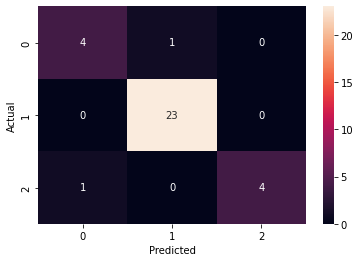

In [64]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [66]:
print("Accuracy Score for DecisionTreeClassifier: ", 0.9696969696969697)
print("Accuracy Score for RandomForestClassifier: ",0.9696969696969697)
print("Accuracy Score for LogisticRegression: ",0.9393939393939394)

Accuracy Score for DecisionTreeClassifier:  0.9696969696969697
Accuracy Score for RandomForestClassifier:  0.9696969696969697
Accuracy Score for LogisticRegression:  0.9393939393939394
